In [1]:
from datasets.synthetic import Synthetic
import numpy as np

n_obs = 10000
gamma_obs = 4.0
data_obs = Synthetic(n_obs, gamma_obs, "pi")
e_x = lambda x: (1+np.exp(- (x*0.75+0.5)))** -1

In [2]:
from methods.QB import QBSensitivityAnalysis
from methods.QB import get_quantile_regressor

gamma = 3.0
obs_inputs = data_obs.x
obs_treatment = data_obs.t
obs_outcome = data_obs.y
tau = gamma / (gamma + 1)
ub_qr_func = get_quantile_regressor(obs_inputs[obs_treatment==1], obs_outcome[obs_treatment==1], tau)
lb_qr_func = get_quantile_regressor(obs_inputs[obs_treatment==1], obs_outcome[obs_treatment==1], 1-tau)

sa = QBSensitivityAnalysis(obs_inputs, obs_treatment, obs_outcome, e_x, gamma, lb_qr_func, ub_qr_func, False)


Best Parameters (LightGBM): {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'learning_rate': 0.05}
Cross Validation Score (LightGBM): 0.872624284142503
Best Parameters (Quantile Regressor): {'alpha': 0, 'fit_intercept': True}
Cross Validation Score (Quantile Regressor): 0.9633228859718862
Best Parameters (LightGBM): {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 10, 'learning_rate': 0.05}
Cross Validation Score (LightGBM): 0.6371613927568257
Best Parameters (Quantile Regressor): {'alpha': 0, 'fit_intercept': True}
Cross Validation Score (Quantile Regressor): 0.8125691376545408


In [3]:
print(f"Unconfounded Y(1): {(data_obs.t * data_obs.y/data_obs.pi).mean()/(data_obs.t /data_obs.pi).mean()}")
print(f"Confounded Y(1): {(data_obs.t * data_obs.y/e_x(data_obs.x)).mean()/(data_obs.t /e_x(data_obs.x)).mean()}")

Unconfounded Y(1): 1.0955791473388672
Confounded Y(1): 0.4113353490829468


In [4]:
lb, ub = sa.solve_bounds()

In [5]:
from bootstrap import BootstrapSensitivityAnalysis

bootstrap = BootstrapSensitivityAnalysis(sa)
bounds_dist = bootstrap.bootstrap(num_samples=1000, results_path = "/Users/javierabad/Documents/GitLab/robust-cate/results/synthetic")

Elapsed time for 1000 bootstrap samples: 476.54 seconds


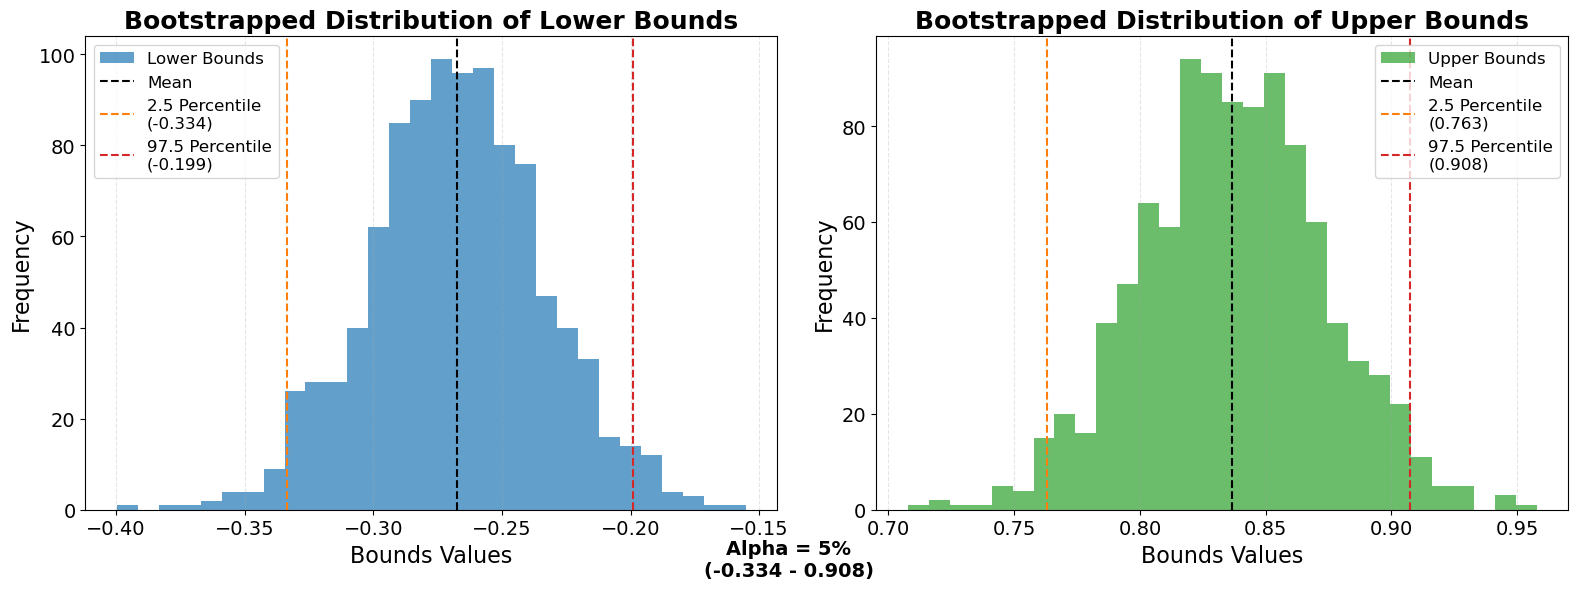

In [6]:
bootstrap.plot_distribution(alpha=5)